In [55]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [56]:
np.random.seed(1)

In [68]:
n = 1024*8
sigma = 1
threshold = sigma * np.sqrt(2*np.log(n))

In [69]:
threshold

4.245212208424754

In [70]:
def f(x):
    if x < 0.5:
        return 10*(x - 0.5)**2
    else:
        return 10*(x - 0.5)

In [71]:
xticks = np.linspace(0, 1, n)

In [72]:
noise = np.random.normal(0, sigma, n)
xticks = np.linspace(0, 1, n)
truth = [f(x) for x in xticks]
data = truth + noise

oracle_coeffs = pywt.wavedec(truth, 'haar', level=None)
censored_oracle = []
for resolution in oracle_coeffs:
    temp = np.array([np.sign(c)*max(abs(c)-threshold,0) for c in resolution])
    censored_oracle.append(temp)

oracle_reconstructed = pywt.waverec(censored_oracle, 'haar')
diff = truth - oracle_reconstructed
diff = [d**2 for d in diff]
oracle_risk = np.mean(diff)

In [73]:
oracle_risk

0.054398268332662446

In [74]:
coeffs = pywt.wavedec(data, 'haar', level=None)

censored_coeffs = []
for resolution in coeffs:
    temp = np.array([np.sign(c)*max(abs(c)-threshold,0) for c in resolution])
    censored_coeffs.append(temp)

reconstructed_data = pywt.waverec(censored_coeffs, 'haar')
diff = truth - reconstructed_data
diff = [d**2 for d in diff]
mse = np.mean(diff)
mse

0.05706071884494121

In [75]:
np.count_nonzero(np.concatenate(censored_coeffs))

17

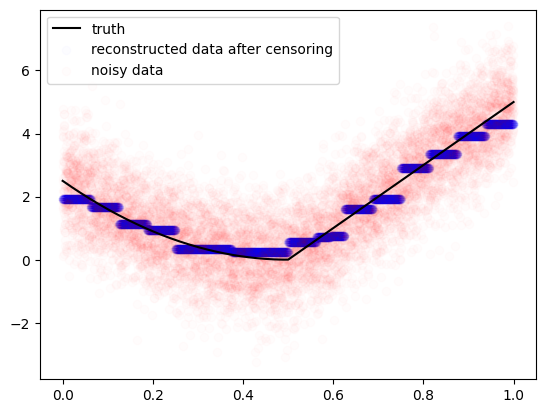

In [76]:
plt.plot(xticks, truth, label='truth', color='black')
plt.scatter(xticks, reconstructed_data, label='reconstructed data after censoring', color='blue', alpha=0.01)
plt.scatter(xticks, data, label='noisy data', color='red', alpha=0.01)
plt.legend()
plt.savefig('bryant_figures/censor.png', dpi=150)